## Conclusions and Next Steps

### Key Achievements

This notebook demonstrated a complete SurvivalLVQ analysis pipeline for heart failure survival data:

1. **Data Loading & Exploration**: Successfully loaded and analyzed survival dataset with comprehensive EDA
2. **Preprocessing**: Implemented robust data preprocessing including categorical encoding and feature scaling
3. **Model Training**: Trained SurvivalLVQ with 4 prototypes to capture patient heterogeneity
4. **Prototype Analysis**: Identified distinct patient subgroups with different survival characteristics
5. **Risk Stratification**: Generated individual risk scores and survival function predictions
6. **Visualization**: Created comprehensive model visualizations including feature relevance analysis

### SurvivalLVQ Advantages

- **Interpretability**: Prototype-based approach provides intuitive patient subgroup identification
- **Personalization**: Individual survival function predictions for personalized medicine
- **Feature Learning**: Automatic feature relevance learning identifies important biomarkers
- **Clinical Relevance**: Transparent model structure suitable for clinical decision support

### Potential Applications

- **Clinical Risk Assessment**: Patient stratification for treatment planning
- **Biomarker Discovery**: Identification of key prognostic features
- **Personalized Medicine**: Individual survival predictions for treatment decisions
- **Population Health**: Understanding disease patterns across patient subgroups

### Next Steps

1. **Model Validation**: Cross-validation and external validation on independent datasets
2. **Feature Investigation**: Clinical interpretation of learned feature relevance
3. **Comparison Studies**: Benchmarking against traditional survival models (Cox, RSF)
4. **Clinical Integration**: Implementation in clinical decision support systems

---

**For more information on SurvivalLVQ methodology, see the original implementation and related publications.**

In [22]:
# Final Summary and Model Performance
print("🏥 " + "="*60)
print("      SURVIVAL LVQ ANALYSIS SUMMARY")
print("="*60)

print(f"\n📊 DATASET INFORMATION")
print(f"   Dataset: {dataset_name}")
print(f"   Total Samples: {X_hd.shape[0]}")
print(f"   Original Features: {X_hd.shape[1]}")
print(f"   Processed Features: {X_train.shape[1]}")
print(f"   Training Samples: {X_train.shape[0]} ({X_train.shape[0]/X_hd.shape[0]*100:.1f}%)")
print(f"   Test Samples: {X_test.shape[0]} ({X_test.shape[0]/X_hd.shape[0]*100:.1f}%)")

print(f"\n⚙️  MODEL CONFIGURATION")
print(f"   Prototypes: {model.n_prototypes}")
print(f"   Training Epochs: {model.epochs}")
print(f"   Learning Rate: {model.lr}")
print(f"   Feature Scaling: SkewTransformer")

print(f"\n🧬 SURVIVAL CHARACTERISTICS")
overall_event_rate = event_indicator.mean()
print(f"   Overall Event Rate: {overall_event_rate:.1%}")
print(f"   Median Follow-up Time: {np.median(event_time):.1f}")
print(f"   Time Range: [{event_time.min():.1f}, {event_time.max():.1f}]")

print(f"\n🎯 PROTOTYPE ANALYSIS")
for _, row in prototype_df.iterrows():
    p = int(row['Prototype'])
    print(f"   Prototype {p}:")
    print(f"     • Patients: {int(row['N_Samples'])} ({row['N_Samples']/total_samples*100:.1f}%)")
    print(f"     • Event Rate: {row['Event_Rate']:.1%}")
    print(f"     • Median Survival: {row['Median_Time']:.1f}")

print(f"\n📈 RISK STRATIFICATION")
# Risk quartiles
risk_quartiles = np.percentile(risk_scores_test, [25, 50, 75])
print(f"   Risk Score Distribution (Test Set):")
print(f"     • Q1 (Low Risk): {risk_quartiles[0]:.4f}")
print(f"     • Q2 (Median): {risk_quartiles[1]:.4f}")
print(f"     • Q3 (High Risk): {risk_quartiles[2]:.4f}")
print(f"     • Range: [{np.min(risk_scores_test):.4f}, {np.max(risk_scores_test):.4f}]")

print(f"\n🔍 KEY FINDINGS")
# Find highest and lowest risk prototypes
prototype_risk_means = []
for p in unique_protos:
    test_mask = proto_test_idx == p
    if np.sum(test_mask) > 0:
        mean_risk = np.mean(risk_scores_test[test_mask])
        prototype_risk_means.append((p, mean_risk))

if prototype_risk_means:
    prototype_risk_means.sort(key=lambda x: x[1])
    lowest_risk_proto = prototype_risk_means[0]
    highest_risk_proto = prototype_risk_means[-1]
    
    print(f"   • Lowest Risk Group: Prototype {lowest_risk_proto[0]} (Risk = {lowest_risk_proto[1]:.4f})")
    print(f"   • Highest Risk Group: Prototype {highest_risk_proto[0]} (Risk = {highest_risk_proto[1]:.4f})")

# Prototype diversity
proto_event_rates = [row['Event_Rate'] for _, row in prototype_df.iterrows()]
event_rate_range = max(proto_event_rates) - min(proto_event_rates)
print(f"   • Event Rate Variation: {event_rate_range:.1%} (from {min(proto_event_rates):.1%} to {max(proto_event_rates):.1%})")
print(f"   • Model identified {len(unique_protos)} distinct patient subgroups")

print(f"\n💡 CLINICAL IMPLICATIONS")
print(f"   • Prototype-based patient stratification enables personalized prognosis")
print(f"   • Feature relevance learning identifies key biomarkers")
print(f"   • Individual survival function predictions support clinical decision-making")
print(f"   • Interpretable model structure facilitates clinical adoption")

print("\n" + "="*60)
print("         ANALYSIS COMPLETED SUCCESSFULLY! ✅")
print("="*60)

🏥 ============================================================
      SURVIVAL LVQ ANALYSIS SUMMARY

📊 DATASET INFORMATION
   Dataset: Veterans Lung Cancer
   Total Samples: 137
   Original Features: 6
   Processed Features: 11
   Training Samples: 95 (69.3%)
   Test Samples: 42 (30.7%)

⚙️  MODEL CONFIGURATION
   Prototypes: 3
   Training Epochs: 200
   Learning Rate: 0.01
   Feature Scaling: SkewTransformer

🧬 SURVIVAL CHARACTERISTICS
   Overall Event Rate: 93.4%
   Median Follow-up Time: 80.0
   Time Range: [1.0, 999.0]

🎯 PROTOTYPE ANALYSIS
   Prototype 0:
     • Patients: 37 (38.9%)
     • Event Rate: 86.5%
     • Median Survival: 186.0
   Prototype 1:
     • Patients: 30 (31.6%)
     • Event Rate: 93.3%
     • Median Survival: 51.5
   Prototype 2:
     • Patients: 28 (29.5%)
     • Event Rate: 96.4%
     • Median Survival: 22.5

📈 RISK STRATIFICATION
   Risk Score Distribution (Test Set):
     • Q1 (Low Risk): -0.1732
     • Q2 (Median): -0.0857
     • Q3 (High Risk): -0.0526
    

## Results Summary {#summary}

Let's summarize the key findings from our SurvivalLVQ analysis of the heart failure dataset.

=== Complete SurvivalLVQ Model Visualization ===
Generating visualizations...
- 2D projection of data points and prototypes
- Prototype survival curves
- Feature relevance matrix
- Feature importance analysis
- Eigenvalue analysis

🎨 Generating model visualization for 95 training samples...
variance coverd by projection: tensor(71.5663)


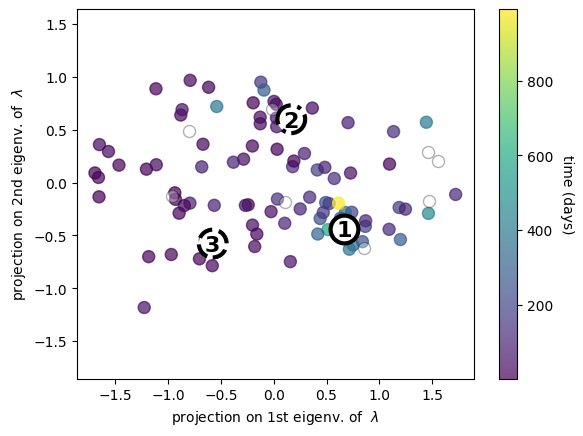

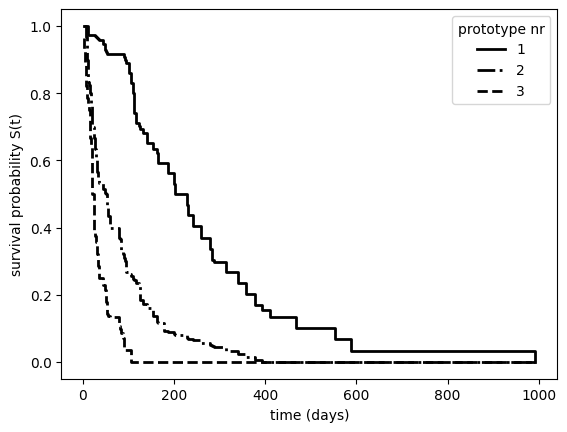

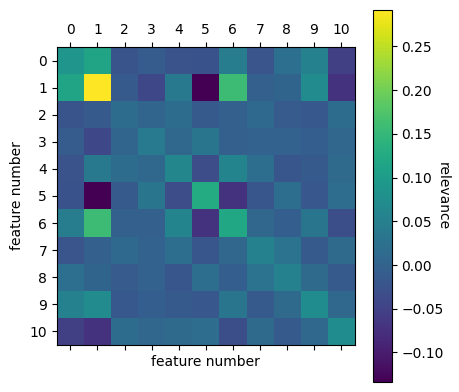

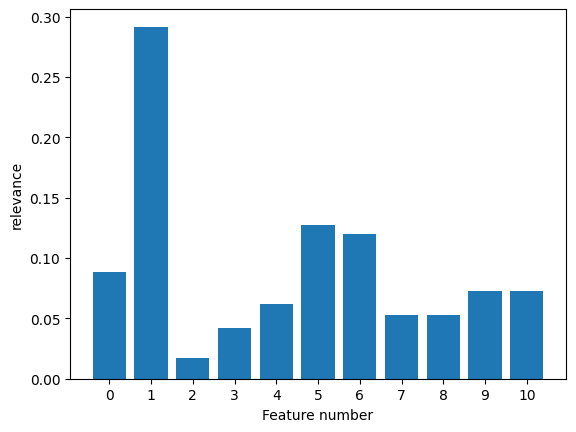

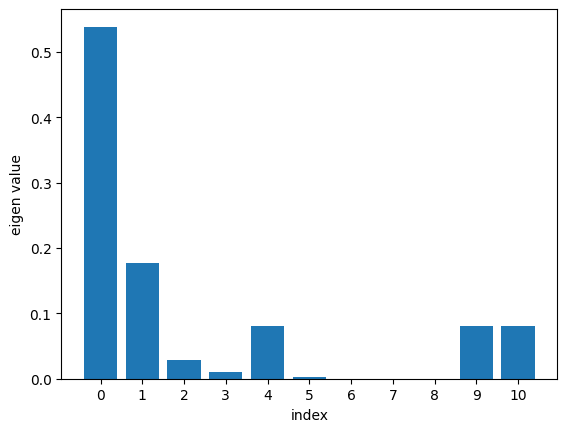


✅ Model visualization completed!
The visualization includes:
1. 2D projection showing data points colored by survival time
2. Prototype positions in the learned feature space
3. Survival curves for each prototype
4. Feature relevance matrix (Lambda matrix)
5. Individual feature relevance scores
6. Eigenvalue spectrum of the relevance matrix


In [21]:
# Generate comprehensive model visualization
print("=== Complete SurvivalLVQ Model Visualization ===")
print("Generating visualizations...")
print("- 2D projection of data points and prototypes")
print("- Prototype survival curves")
print("- Feature relevance matrix")
print("- Feature importance analysis")
print("- Eigenvalue analysis")

# Extract survival data for visualization
D_train = np.array([event for event, _ in y_train])
T_train = np.array([time for _, time in y_train])

# Generate the comprehensive visualization
print(f"\n🎨 Generating model visualization for {len(X_train_scaled)} training samples...")
model.vis(X_train_scaled, D_train, T_train, print_variance_covered=True)

print("\n✅ Model visualization completed!")
print("The visualization includes:")
print("1. 2D projection showing data points colored by survival time")
print("2. Prototype positions in the learned feature space")
print("3. Survival curves for each prototype")
print("4. Feature relevance matrix (Lambda matrix)")
print("5. Individual feature relevance scores")
print("6. Eigenvalue spectrum of the relevance matrix")

## Model Visualization {#visualization}

The SurvivalLVQ model provides comprehensive visualizations including feature projections, prototype locations, survival curves, and feature relevance analysis.

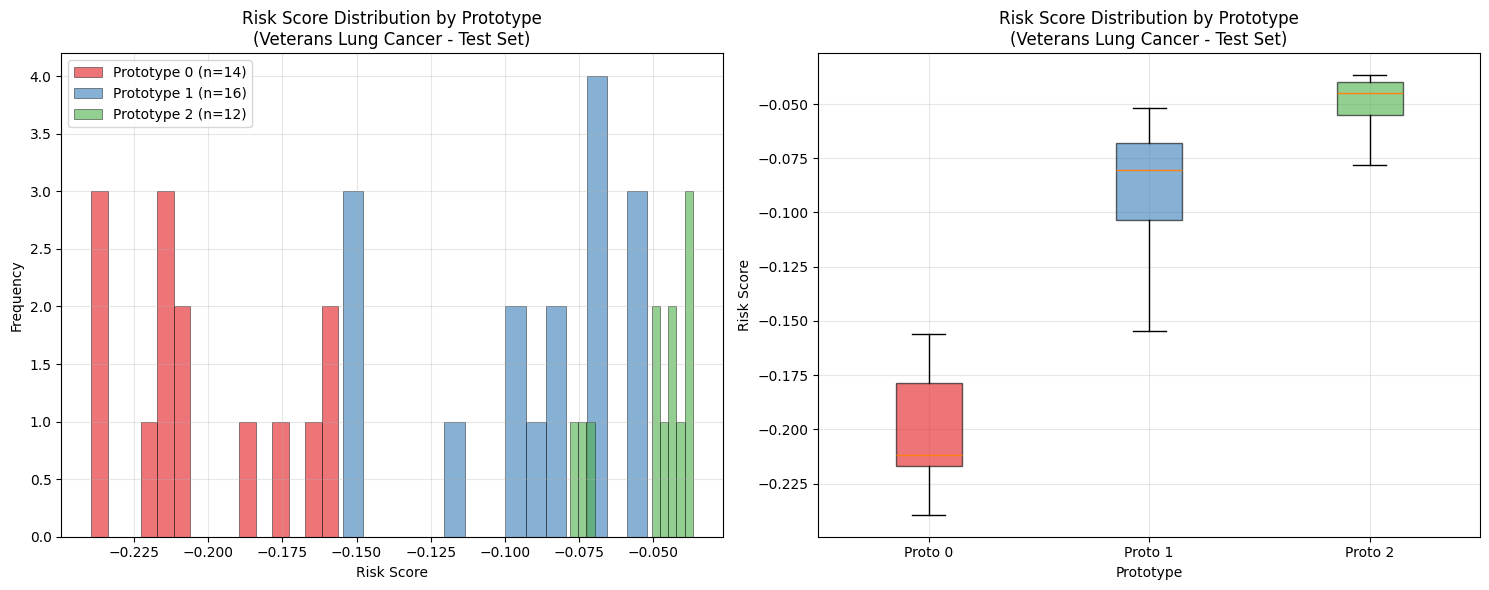

✅ Risk score analysis visualization completed


In [20]:
# Risk score distribution analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Risk score distribution by prototype (Test set)
for i, p in enumerate(unique_protos):
    mask = proto_test_idx == p
    if np.sum(mask) > 0:
        proto_risk_scores = risk_scores_test[mask]
        color = prototype_colors[i % len(prototype_colors)]
        ax1.hist(proto_risk_scores, alpha=0.6, label=f"Prototype {p} (n={np.sum(mask)})", 
                bins=15, color=color, edgecolor='black', linewidth=0.5)

ax1.set_xlabel("Risk Score")
ax1.set_ylabel("Frequency")
ax1.set_title(f"Risk Score Distribution by Prototype\n({dataset_name} - Test Set)")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot of risk scores by prototype
risk_data = []
prototype_labels = []
for p in unique_protos:
    mask = proto_test_idx == p
    if np.sum(mask) > 0:
        risk_data.append(risk_scores_test[mask])
        prototype_labels.append(f"Proto {p}")

if risk_data:
    bp = ax2.boxplot(risk_data, labels=prototype_labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], prototype_colors[:len(risk_data)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)

ax2.set_xlabel("Prototype")
ax2.set_ylabel("Risk Score")
ax2.set_title(f"Risk Score Distribution by Prototype\n({dataset_name} - Test Set)")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Risk score analysis visualization completed")

=== Individual Survival Function Predictions ===
Generating Kaplan-Meier curves by prototype...


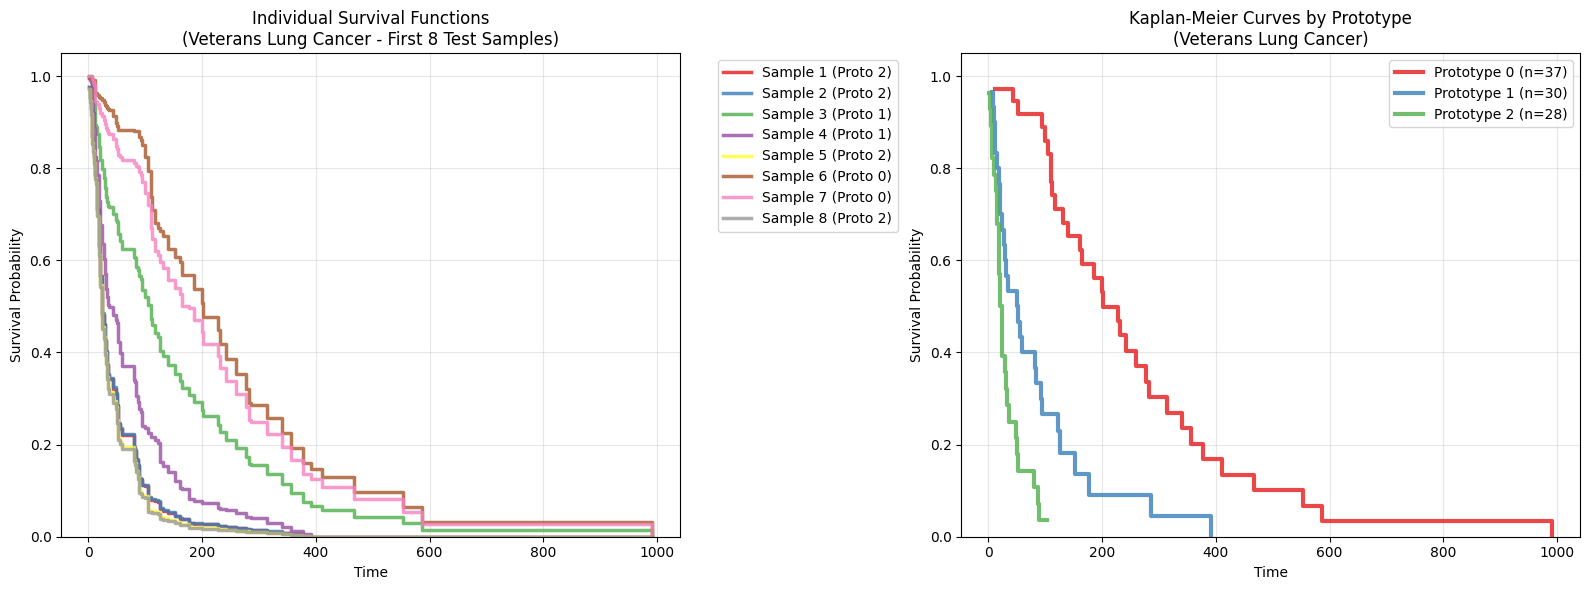

✅ Generated survival function predictions for 8 test samples


In [19]:
# Predict individual survival functions
print("=== Individual Survival Function Predictions ===")
n_samples_to_show = 8  # Number of test samples to visualize
survival_functions = model.predict_survival_function(X_test_scaled[:n_samples_to_show])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot individual survival functions
timepoints = model.timepoints.numpy()
colors = plt.cm.Set1(np.linspace(0, 1, n_samples_to_show))

for i, (surv_func, color) in enumerate(zip(survival_functions, colors)):
    survival_probs = surv_func(timepoints)
    prototype = proto_test_idx[i]
    ax1.step(timepoints, survival_probs, where="post", 
             label=f"Sample {i+1} (Proto {prototype})", 
             linewidth=2.5, color=color, alpha=0.8)

ax1.set_xlabel("Time")
ax1.set_ylabel("Survival Probability")
ax1.set_title(f"Individual Survival Functions\n({dataset_name} - First {n_samples_to_show} Test Samples)")
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1.05)

# Kaplan-Meier curves by prototype
print("Generating Kaplan-Meier curves by prototype...")
prototype_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

for i, p in enumerate(unique_protos):
    mask = proto_train_idx == p
    if np.sum(mask) > 5:  # Only plot if sufficient samples
        proto_events = y_train[mask]
        events = np.array([event for event, _ in proto_events])
        times = np.array([time for _, time in proto_events])
        
        # Calculate Kaplan-Meier curve
        km_time, km_prob = kaplan_meier_estimator(events, times)
        color = prototype_colors[i % len(prototype_colors)]
        ax2.step(km_time, km_prob, where="post", 
                label=f"Prototype {p} (n={np.sum(mask)})", 
                color=color, linewidth=3, alpha=0.8)

ax2.set_xlabel("Time")
ax2.set_ylabel("Survival Probability")
ax2.set_title(f"Kaplan-Meier Curves by Prototype\n({dataset_name})")
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print(f"✅ Generated survival function predictions for {n_samples_to_show} test samples")

## Survival Function Predictions {#predictions}

Now let's generate and visualize individual survival function predictions and compare survival curves across prototypes.

In [18]:
# Risk score analysis
risk_scores_train = model.predict(X_train_scaled)
risk_scores_test = model.predict(X_test_scaled)

print("=== Risk Score Analysis ===")
print(f"Training risk scores:")
print(f"  Mean: {np.mean(risk_scores_train):.4f} ± {np.std(risk_scores_train):.4f}")
print(f"  Range: [{np.min(risk_scores_train):.4f}, {np.max(risk_scores_train):.4f}]")

print(f"\nTest risk scores:")
print(f"  Mean: {np.mean(risk_scores_test):.4f} ± {np.std(risk_scores_test):.4f}")
print(f"  Range: [{np.min(risk_scores_test):.4f}, {np.max(risk_scores_test):.4f}]")

# Analyze risk scores by prototype
print(f"\n=== Risk Scores by Prototype ===")
for p in unique_protos:
    train_mask = proto_train_idx == p
    test_mask = proto_test_idx == p
    
    if np.sum(train_mask) > 0:
        proto_risk_train = risk_scores_train[train_mask]
        print(f"Prototype {p} (Training): Mean = {np.mean(proto_risk_train):.4f}, Std = {np.std(proto_risk_train):.4f}")
    
    if np.sum(test_mask) > 0:
        proto_risk_test = risk_scores_test[test_mask]
        print(f"Prototype {p} (Test): Mean = {np.mean(proto_risk_test):.4f}, Std = {np.std(proto_risk_test):.4f}")

print("\nPrototype analysis completed!")

=== Risk Score Analysis ===
Training risk scores:
  Mean: -0.1228 ± 0.0764
  Range: [-0.2424, -0.0336]

Test risk scores:
  Mean: -0.1163 ± 0.0685
  Range: [-0.2394, -0.0366]

=== Risk Scores by Prototype ===
Prototype 0 (Training): Mean = -0.2106, Std = 0.0297
Prototype 0 (Test): Mean = -0.2022, Std = 0.0279
Prototype 1 (Training): Mean = -0.0846, Std = 0.0289
Prototype 1 (Test): Mean = -0.0904, Std = 0.0337
Prototype 2 (Training): Mean = -0.0475, Std = 0.0181
Prototype 2 (Test): Mean = -0.0507, Std = 0.0143

Prototype analysis completed!


In [17]:
# Analyze prototype assignments
proto_train_idx = model.predict_closest(X_train_scaled)
proto_test_idx = model.predict_closest(X_test_scaled)

print("=== Prototype Assignment Analysis ===")
unique_protos, counts = np.unique(proto_train_idx, return_counts=True)
total_samples = len(proto_train_idx)

for proto, count in zip(unique_protos, counts):
    percentage = count / total_samples * 100
    print(f"Prototype {proto}: {count} training samples ({percentage:.1f}%)")

# Analyze survival characteristics by prototype
print("\n=== Survival Analysis by Prototype ===")
prototype_stats = []

for p in unique_protos:
    mask = proto_train_idx == p
    if np.sum(mask) > 0:
        # Extract survival data for this prototype
        proto_events = y_train[mask]
        proto_event_indicators = np.array([event for event, _ in proto_events])
        proto_times = np.array([time for _, time in proto_events])
        
        # Calculate statistics
        n_samples = np.sum(mask)
        event_rate = np.mean(proto_event_indicators)
        median_time = np.median(proto_times)
        mean_time = np.mean(proto_times)
        
        # Store for summary table
        prototype_stats.append({
            'Prototype': p,
            'N_Samples': n_samples,
            'Event_Rate': event_rate,
            'Median_Time': median_time,
            'Mean_Time': mean_time
        })
        
        print(f"\nPrototype {p}:")
        print(f"  📊 Samples: {n_samples} ({n_samples/total_samples*100:.1f}%)")
        print(f"  💀 Event rate: {event_rate:.1%}")
        print(f"  ⏱️  Median time: {median_time:.1f}")
        print(f"  📈 Mean time: {mean_time:.1f}")
        
        # Feature analysis for this prototype
        proto_features = X_train_scaled[mask]
        overall_mean = np.mean(X_train_scaled, axis=0)
        proto_mean = np.mean(proto_features, axis=0)
        
        # Find most distinctive features (largest deviation from overall mean)
        feature_deviations = np.abs(proto_mean - overall_mean)
        top_feature_indices = np.argsort(feature_deviations)[-3:][::-1]  # Top 3
        
        print(f"  🔍 Top distinctive features:")
        for idx in top_feature_indices:
            if idx < len(feature_names):
                deviation = proto_mean[idx] - overall_mean[idx]
                direction = "higher" if deviation > 0 else "lower"
                print(f"    • {feature_names[idx]}: {proto_mean[idx]:.3f} ({direction} than average by {abs(deviation):.3f})")

# Create summary table
prototype_df = pd.DataFrame(prototype_stats)
print(f"\n=== Prototype Summary Table ===")
display(prototype_df.round(3))

=== Prototype Assignment Analysis ===
Prototype 0: 37 training samples (38.9%)
Prototype 1: 30 training samples (31.6%)
Prototype 2: 28 training samples (29.5%)

=== Survival Analysis by Prototype ===

Prototype 0:
  📊 Samples: 37 (38.9%)
  💀 Event rate: 86.5%
  ⏱️  Median time: 186.0
  📈 Mean time: 232.1
  🔍 Top distinctive features:
    • Karnofsky_score: 0.752 (higher than average by 0.752)
    • Celltype_smallcell: -0.713 (lower than average by 0.713)
    • Celltype_squamous: 0.569 (higher than average by 0.569)

Prototype 1:
  📊 Samples: 30 (31.6%)
  💀 Event rate: 93.3%
  ⏱️  Median time: 51.5
  📈 Mean time: 77.3
  🔍 Top distinctive features:
    • Celltype_smallcell: 0.768 (higher than average by 0.768)
    • Treatment_standard: 0.677 (higher than average by 0.677)
    • Treatment_test: -0.677 (lower than average by 0.677)

Prototype 2:
  📊 Samples: 28 (29.5%)
  💀 Event rate: 96.4%
  ⏱️  Median time: 22.5
  📈 Mean time: 31.7
  🔍 Top distinctive features:
    • Karnofsky_score: -0

,Prototype,N_Samples,Event_Rate,Median_Time,Mean_Time
0,0,37,0.865,186.0,232.108
1,1,30,0.933,51.5,77.333
2,2,28,0.964,22.5,31.679


## Prototype Analysis {#prototype-analysis}

Let's analyze how patients are assigned to different prototypes and understand the characteristics of each subgroup.

In [16]:
# Initialize and train SurvivalLVQ model
print("=== SurvivalLVQ Model Training ===")

# Model hyperparameters
n_prototypes = 3  # Number of patient subgroups to identify
epochs = 200       # Training epochs
learning_rate = 1e-2  # Learning rate

print(f"Model configuration:")
print(f"  Prototypes: {n_prototypes}")
print(f"  Epochs: {epochs}")
print(f"  Learning rate: {learning_rate}")
print(f"  Device: CPU")

# Initialize model
model = SurvivalLVQ(
    n_prototypes=n_prototypes,
    epochs=epochs,
    lr=learning_rate,
    verbose=True,
    batch_size=128  # Adjust based on dataset size
)

print(f"\n🚀 Starting training on {X_train_scaled.shape[0]} samples...")
print("=" * 60)

# Train the model
model.fit(X_train_scaled, y_train)

print("=" * 60)
print("✅ Training completed successfully!")
print(f"Model trained with {model.n_prototypes} prototypes over {model.epochs} epochs")

=== SurvivalLVQ Model Training ===
Model configuration:
  Prototypes: 3
  Epochs: 200
  Learning rate: 0.01
  Device: CPU

🚀 Starting training on 95 samples...
Epoch: 1 / 200 | Loss: 0.095790
Epoch: 2 / 200 | Loss: 0.095121
Epoch: 3 / 200 | Loss: 0.097511
Epoch: 4 / 200 | Loss: 0.093975
Epoch: 5 / 200 | Loss: 0.095423
Epoch: 6 / 200 | Loss: 0.096164
Epoch: 7 / 200 | Loss: 0.096071
Epoch: 8 / 200 | Loss: 0.093840
Epoch: 9 / 200 | Loss: 0.092597
Epoch: 10 / 200 | Loss: 0.096203
Epoch: 11 / 200 | Loss: 0.095172
Epoch: 12 / 200 | Loss: 0.090783
Epoch: 13 / 200 | Loss: 0.096096
Epoch: 14 / 200 | Loss: 0.097838
Epoch: 15 / 200 | Loss: 0.095694
Epoch: 16 / 200 | Loss: 0.089805
Epoch: 17 / 200 | Loss: 0.092910
Epoch: 18 / 200 | Loss: 0.092139
Epoch: 19 / 200 | Loss: 0.093490
Epoch: 20 / 200 | Loss: 0.091745
Epoch: 21 / 200 | Loss: 0.091137
Epoch: 22 / 200 | Loss: 0.086781
Epoch: 23 / 200 | Loss: 0.086373
Epoch: 24 / 200 | Loss: 0.087198
Epoch: 25 / 200 | Loss: 0.088392
Epoch: 26 / 200 | Loss: 

## SurvivalLVQ Model Training {#model-training}

Now we'll train the SurvivalLVQ model with multiple prototypes to capture different survival patterns in the data.

In [6]:
# Feature scaling using SkewTransformer
print("=== Feature Scaling ===")
scaler = SkewTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ SkewTransformer applied successfully")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Training data statistics after scaling:")
print(f"  Mean: {np.mean(X_train_scaled):.6f}")
print(f"  Std: {np.std(X_train_scaled):.6f}")
print(f"  Min: {np.min(X_train_scaled):.3f}")
print(f"  Max: {np.max(X_train_scaled):.3f}")

# Check for any remaining NaN values
nan_count = np.isnan(X_train_scaled).sum()
if nan_count > 0:
    print(f"⚠️  Warning: {nan_count} NaN values found after scaling")
    X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0)
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0)
    print("✓ NaN values replaced with 0.0")
else:
    print("✓ No NaN values detected after scaling")

print("Data preprocessing completed successfully!")

=== Feature Scaling ===
✓ SkewTransformer applied successfully
Scaled training data shape: (95, 11)
Training data statistics after scaling:
  Mean: 0.000000
  Std: 1.000000
  Min: -2.210
  Max: 3.199
✓ No NaN values detected after scaling
Data preprocessing completed successfully!


In [24]:
def preprocess_survival_data(X_df, y, test_size=0.3, random_state=42):
    """
    Comprehensive preprocessing for survival data
    
    Args:
        X_df: Feature DataFrame
        y: Structured survival array
        test_size: Proportion for test set
        random_state: Random seed for reproducibility
    
    Returns:
        X_train, X_test, y_train, y_test, feature_names
    """
    print("=== Data Preprocessing ===")
    
    # Create a copy to avoid modifying original data
    X_processed = X_df.copy()
    
    # Identify feature types
    categorical_cols = X_processed.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X_processed.select_dtypes(include=[np.number]).columns.tolist()
    
    print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")
    print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")
    
    # Handle missing values
    if X_processed.isnull().sum().sum() > 0:
        print("Handling missing values...")
        # For numerical: fill with median
        for col in numerical_cols:
            if X_processed[col].isnull().sum() > 0:
                median_val = X_processed[col].median()
                X_processed[col].fillna(median_val, inplace=True)
                print(f"  {col}: filled {X_processed[col].isnull().sum()} missing values with median {median_val:.2f}")
        
        # For categorical: fill with mode
        for col in categorical_cols:
            if X_processed[col].isnull().sum() > 0:
                mode_val = X_processed[col].mode().iloc[0] if not X_processed[col].mode().empty else 'Unknown'
                X_processed[col].fillna(mode_val, inplace=True)
                print(f"  {col}: filled {X_processed[col].isnull().sum()} missing values with mode '{mode_val}'")
    
    # One-hot encode categorical features
    if categorical_cols:
        print(f"One-hot encoding {len(categorical_cols)} categorical features...")
        X_processed = pd.get_dummies(X_processed, columns=categorical_cols, drop_first=False)
        print(f"Features after encoding: {X_processed.shape[1]} (added {X_processed.shape[1] - len(X_df.columns)} dummy variables)")
    
    # Convert to numpy array
    X_array = X_processed.values.astype(float)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_array, y, test_size=test_size, random_state=random_state, stratify=y_hd['death']
    )
    
    print(f"Data split completed:")
    print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_array)*100:.1f}%)")
    print(f"  Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_array)*100:.1f}%)")
    print(f"  Total features: {X_train.shape[1]}")
    
    return X_train, X_test, y_train, y_test, X_processed.columns.tolist()

# Apply preprocessing
X_train, X_test, y_train, y_test, feature_names = preprocess_survival_data(X_hd, y_hd)

# Display training set survival statistics
train_events = np.array([event for event, _ in y_train])
train_times = np.array([time for _, time in y_train])
test_events = np.array([event for event, _ in y_test])
test_times = np.array([time for _, time in y_test])

print(f"\n=== Training Set Survival Statistics ===")
print(f"Events: {train_events.sum()} / {len(train_events)} ({train_events.mean()*100:.1f}%)")
print(f"Median time: {np.median(train_times):.1f}")

print(f"\n=== Test Set Survival Statistics ===")
print(f"Events: {test_events.sum()} / {len(test_events)} ({test_events.mean()*100:.1f}%)")
print(f"Median time: {np.median(test_times):.1f}")

=== Data Preprocessing ===
Categorical features (3): ['Celltype', 'Prior_therapy', 'Treatment']
Numerical features (3): ['Age_in_years', 'Karnofsky_score', 'Months_from_Diagnosis']
One-hot encoding 3 categorical features...
Features after encoding: 11 (added 5 dummy variables)


ValueError: no field of name death

## Data Preprocessing {#preprocessing}

Before training the SurvivalLVQ model, we need to preprocess the data by handling categorical variables, scaling features, and splitting into training/test sets.

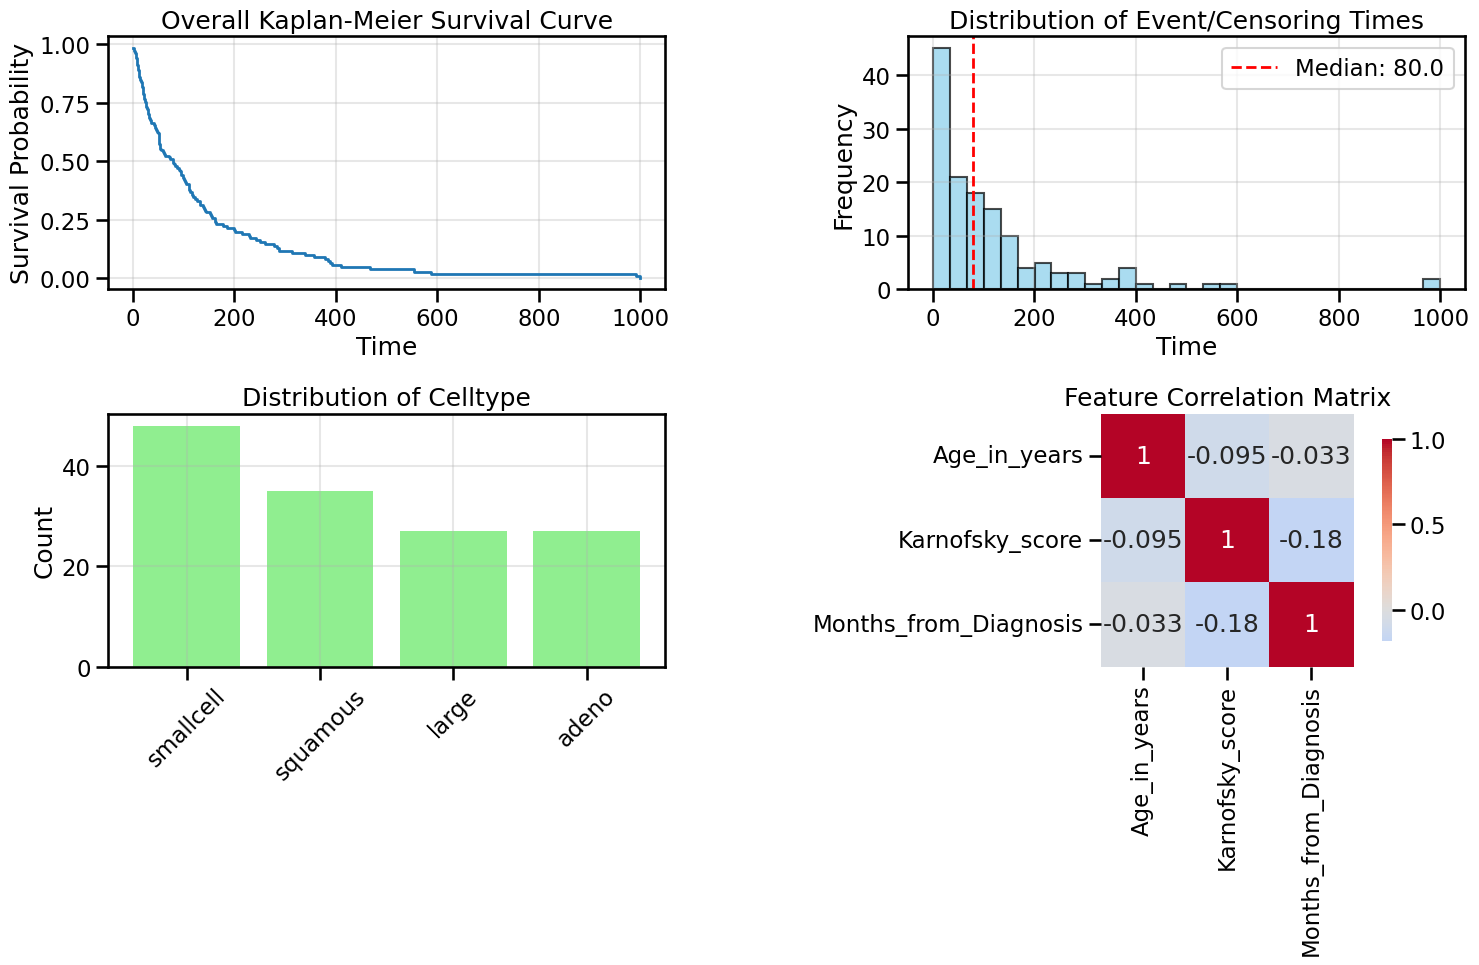

Exploratory data analysis completed for Veterans Lung Cancer dataset.


In [4]:
# Visualize overall survival curve and feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall Kaplan-Meier survival curve
times, surv_prob = kaplan_meier_estimator(event_indicator.astype(bool), event_time.astype(float))
axes[0, 0].step(times, surv_prob, where="post", linewidth=2)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Survival Probability")
axes[0, 0].set_title("Overall Kaplan-Meier Survival Curve")
axes[0, 0].grid(True, alpha=0.3)

# Event time distribution
axes[0, 1].hist(event_time, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].axvline(np.median(event_time), color='red', linestyle='--', linewidth=2, label=f'Median: {np.median(event_time):.1f}')
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Distribution of Event/Censoring Times")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Categorical features (if any)
categorical_cols = X_hd.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    # Show distribution of first categorical variable
    first_cat_col = categorical_cols[0]
    value_counts = X_hd[first_cat_col].value_counts()
    axes[1, 0].bar(range(len(value_counts)), value_counts.values, color='lightgreen')
    axes[1, 0].set_xticks(range(len(value_counts)))
    axes[1, 0].set_xticklabels(value_counts.index, rotation=45)
    axes[1, 0].set_ylabel("Count")
    axes[1, 0].set_title(f"Distribution of {first_cat_col}")
    axes[1, 0].grid(True, alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, "No categorical\nfeatures found", 
                    transform=axes[1, 0].transAxes, ha='center', va='center', fontsize=12)
    axes[1, 0].set_title("Categorical Features")

# Numeric features correlation heatmap (if multiple numeric features exist)
if len(numeric_cols) > 1:
    corr_matrix = X_hd[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=axes[1, 1], cbar_kws={"shrink": .8})
    axes[1, 1].set_title("Feature Correlation Matrix")
else:
    axes[1, 1].text(0.5, 0.5, "Insufficient numeric\nfeatures for correlation", 
                    transform=axes[1, 1].transAxes, ha='center', va='center', fontsize=12)
    axes[1, 1].set_title("Feature Correlations")

plt.tight_layout()
plt.show()

print(f"Exploratory data analysis completed for {dataset_name} dataset.")

In [3]:
# Analyze survival data structure and basic statistics
print("=== Survival Data Analysis ===")

# Extract event indicator and time from structured array
event_indicator = y_hd['death'] if 'death' in y_hd.dtype.names else y_hd[y_hd.dtype.names[0]]
event_time = y_hd['time'] if 'time' in y_hd.dtype.names else y_hd[y_hd.dtype.names[1]]

print(f"Survival endpoint: {y_hd.dtype.names}")
print(f"Total samples: {len(y_hd)}")
print(f"Events observed: {event_indicator.sum()} / {len(event_indicator)} ({event_indicator.mean()*100:.1f}%)")
print(f"Median follow-up time: {np.median(event_time):.1f}")
print(f"Time range: [{event_time.min():.1f}, {event_time.max():.1f}]")

# Check for missing values
print(f"\n=== Missing Values Analysis ===")
missing_counts = X_hd.isnull().sum()
missing_percent = (missing_counts / len(X_hd) * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_summary[missing_summary['Missing Count'] > 0])

# Display data types
print(f"\n=== Data Types ===")
print(X_hd.dtypes)

# Basic descriptive statistics for numeric columns
print(f"\n=== Descriptive Statistics (Numeric Features) ===")
numeric_cols = X_hd.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    display(X_hd[numeric_cols].describe().round(3))

=== Survival Data Analysis ===
Survival endpoint: ('Status', 'Survival_in_days')
Total samples: 137
Events observed: 128 / 137 (93.4%)
Median follow-up time: 80.0
Time range: [1.0, 999.0]

=== Missing Values Analysis ===
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

=== Data Types ===
Age_in_years              float64
Celltype                 category
Karnofsky_score           float64
Months_from_Diagnosis     float64
Prior_therapy            category
Treatment                category
dtype: object

=== Descriptive Statistics (Numeric Features) ===


,Age_in_years,Karnofsky_score,Months_from_Diagnosis
count,137.000,137.000,137.000
mean,58.307,58.569,8.774
std,10.542,20.040,10.612
min,34.000,10.000,1.000
25%,51.000,40.000,3.000
50%,62.000,60.000,5.000
75%,66.000,75.000,11.000
max,81.000,99.000,87.000


In [2]:
try:
    # Try to load HDFAIL dataset
    from sksurv.datasets import load_hdfail
    X_hd, y_hd = load_hdfail()
    dataset_name = "HDFAIL (Heart Failure)"
    print("✓ HDFAIL dataset loaded successfully!")
    
except ImportError:
    print("HDFAIL dataset not available, trying alternative datasets...")
    try:
        # Try Veterans Lung Cancer dataset
        from sksurv.datasets import load_veterans_lung_cancer
        X_hd, y_hd = load_veterans_lung_cancer()
        dataset_name = "Veterans Lung Cancer"
        print("✓ Using Veterans Lung Cancer dataset as alternative")
        
    except ImportError:
        try:
            # Try Flchain dataset
            from sksurv.datasets import load_flchain
            X_hd, y_hd = load_flchain()
            dataset_name = "FLChain"
            print("✓ Using FLChain dataset as alternative")
            
        except ImportError:
            # Fallback to GBSG2
            from sksurv.datasets import load_gbsg2
            X_hd, y_hd = load_gbsg2()
            dataset_name = "GBSG2 (Breast Cancer)"
            print("✓ Using GBSG2 dataset as fallback")
            
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Final fallback
    from sksurv.datasets import load_gbsg2
    X_hd, y_hd = load_gbsg2()
    dataset_name = "GBSG2 (Breast Cancer)"
    print("✓ Using GBSG2 dataset as final fallback")

# Display basic information about the dataset
print(f"\n=== {dataset_name} Dataset Overview ===")
print(f"Shape: {X_hd.shape} (samples: {X_hd.shape[0]}, features: {X_hd.shape[1]})")
print(f"Features: {list(X_hd.columns)}")
print(f"\nFirst few rows:")
display(X_hd.head())

HDFAIL dataset not available, trying alternative datasets...
✓ Using Veterans Lung Cancer dataset as alternative

=== Veterans Lung Cancer Dataset Overview ===
Shape: (137, 6) (samples: 137, features: 6)
Features: ['Age_in_years', 'Celltype', 'Karnofsky_score', 'Months_from_Diagnosis', 'Prior_therapy', 'Treatment']

First few rows:


,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard


## Data Loading and Exploration {#data-loading}

We'll attempt to load the Heart Failure Dataset (HDFAIL). If not available, we'll use an alternative cardiovascular or survival dataset for demonstration.

In [1]:
# Clear all variables
%reset -f

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Import survival analysis libraries
from sksurv.datasets import get_x_y
import sksurv.datasets as datasets
from sksurv.nonparametric import kaplan_meier_estimator

# Import custom modules
from Models.SurvivalLVQ import SurvivalLVQ
from SkewTransformer import SkewTransformer

# Set plotting style
plt.style.use("default")
sns.set_context("talk")
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## Setup and Imports

First, we'll import all necessary libraries and set up the environment for our analysis.

# Heart Failure Dataset Analysis with SurvivalLVQ

This notebook demonstrates how to apply **SurvivalLVQ** (Survival Learning Vector Quantization) to heart failure survival data. SurvivalLVQ is a prototype-based method that learns interpretable representations for survival analysis by identifying key patient subgroups and their associated survival patterns.

## Overview

- **Dataset**: Heart Failure Dataset (HDFAIL) or alternative cardiovascular survival datasets
- **Method**: SurvivalLVQ with multiple prototypes to capture patient heterogeneity  
- **Goal**: Identify distinct survival patterns and risk groups in heart failure patients
- **Key Features**:
  - Prototype-based clustering for interpretable patient subgroups
  - Individual survival function predictions
  - Feature relevance learning for biomarker identification
  - Risk stratification and prognostic modeling

## Table of Contents

1. [Data Loading and Exploration](#data-loading)
2. [Data Preprocessing](#preprocessing) 
3. [SurvivalLVQ Model Training](#model-training)
4. [Prototype Analysis](#prototype-analysis)
5. [Survival Function Predictions](#predictions)
6. [Model Visualization](#visualization)
7. [Results Summary](#summary)